# Проект по логистической регрессии

**Задача: Создать модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**


## Imports



In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

----


In [82]:
df = pd.read_csv('..\\DATA\\heart.csv')

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
df['target'].unique()

array([1, 0], dtype=int64)

### Анализ данных и визуализация данных


**Посмотрим, есть ли в наборе данных отсутствующие значения, и создадим статистический отчёт о числовых колонках, как показано ниже.**

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [86]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Задачи по визуализации данных

**Нарисуем график bar plot, показывающий количество точек для каждого значения target.**

<AxesSubplot:xlabel='target', ylabel='count'>

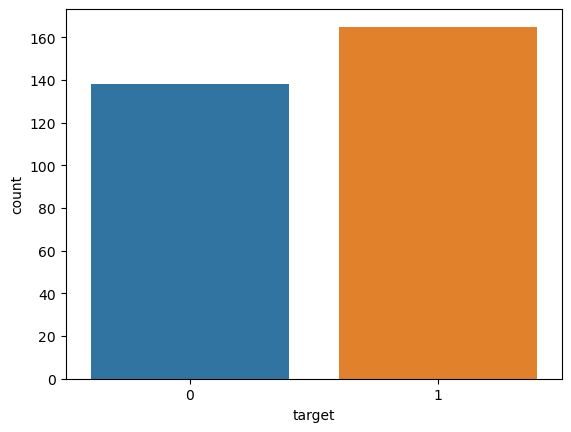

In [88]:
# Напишите Ваш код здесь
sns.countplot(data=df, x='target')

**Нарисуем график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*

<Figure size 1750x1250 with 0 Axes>

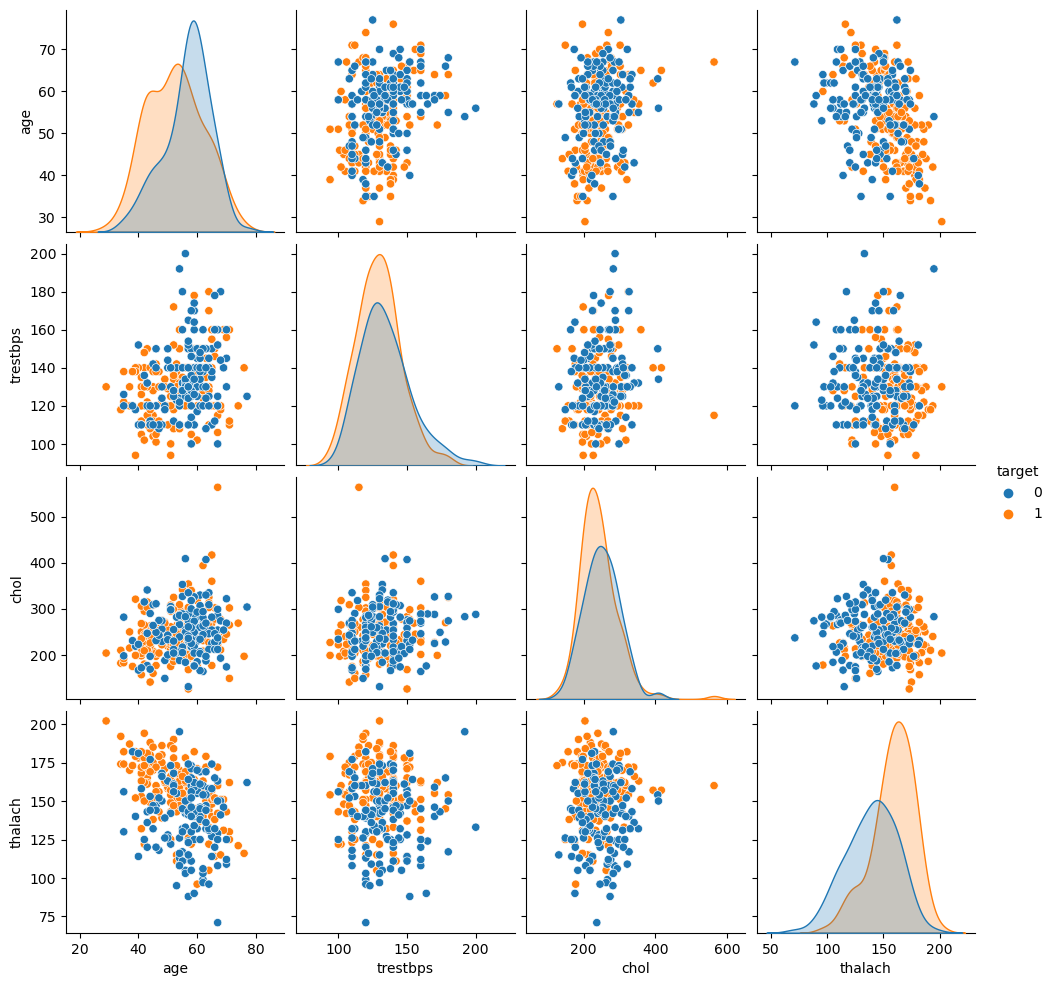

In [89]:
plt.figure(figsize=(7,5), dpi=250)
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']],diag_kind='kde', hue='target')

In [90]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Нарисуем график heatmap, показывающий корреляции между всеми колонками.**

In [91]:
mask = np.ones((14,14))
mask[np.tril_indices_from(mask)] = 0

<AxesSubplot:>

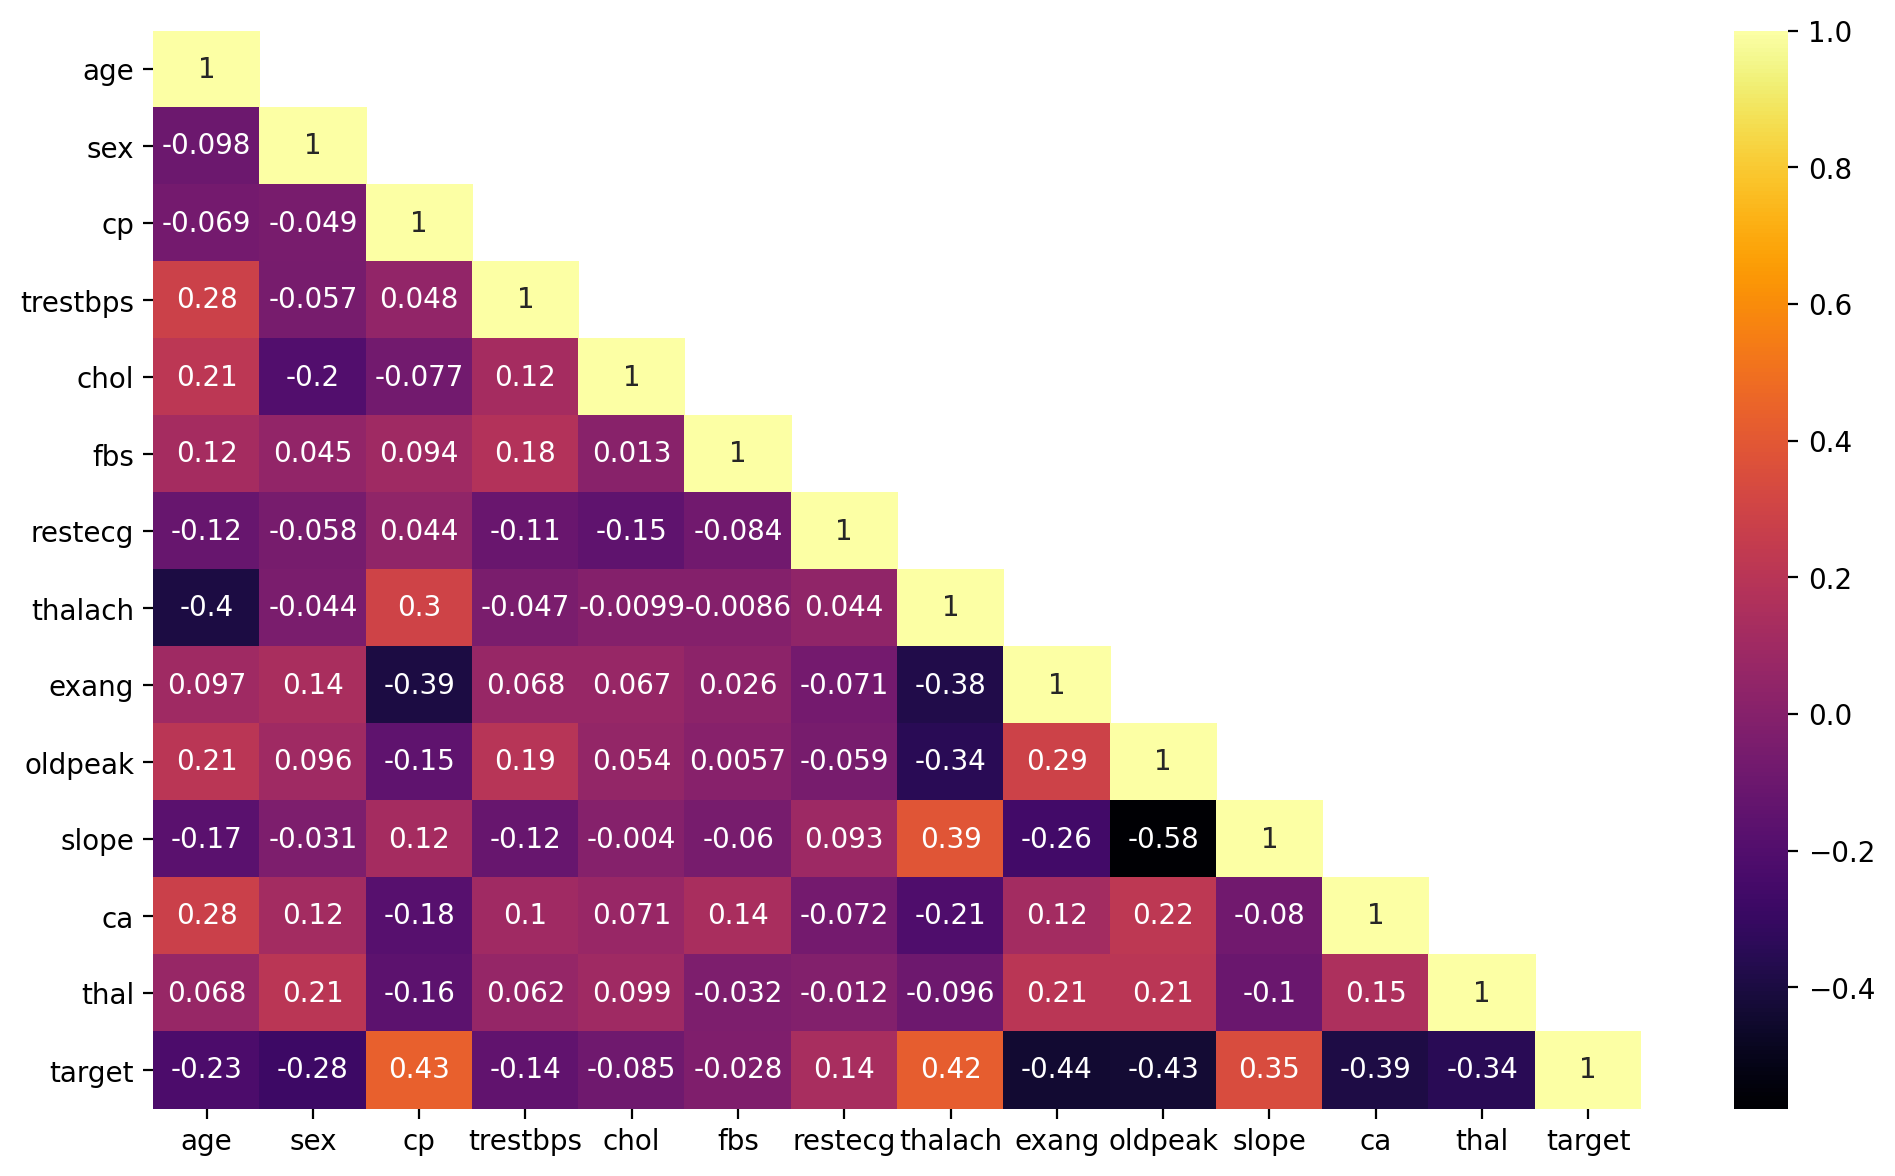

In [186]:
plt.figure(figsize=(12,7), dpi=200)
sns.heatmap(data=df.corr(),annot=True, mask=mask, cmap='inferno')


----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**Разделим все признаки на 2 объекта, X и y.**

In [93]:
X = df.drop('target', axis=1)
y = df.target

**Разобьем данные на обучающий и тестовый наборы данных. Для тестовых данных используем размер 10% и значение random_state=101.**

In [94]:
# Напишите Ваш код здесь
from sklearn.model_selection import train_test_split

In [95]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**С помощью объекта StandardScaler нормализуем данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедимся, что мы проводим обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

**Создадим модель логистической регрессии, и с помощью кросс-валидации найдем хорошее значение значение C. У нас здесь есть 2 варианта - либо *LogisticRegressionCV*, либо комбинация *LogisticRegression* и *GridSearchCV.**

In [99]:
# Напишите Ваш код здесь
from sklearn.linear_model import LogisticRegressionCV

In [109]:
penalty = 'elasticnet'
Cs= np.linspace(1,10,20)
l1_ratios= np.linspace(0,1,15)
log_model_CV = LogisticRegressionCV(solver='saga', 
                                    penalty = penalty, 
                                    cv=10, 
                                    max_iter=10000,
                                    Cs=Cs,
                                    l1_ratios=l1_ratios)

In [110]:
log_model_CV.fit(scaled_X_train, y_train)

LogisticRegressionCV(Cs=array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ]),
                     cv=10,
                     l1_ratios=array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
                     max_iter=10000, penalty='elasticnet', solver='saga')

In [117]:
log_model_CV.coef_

array([[-0.04782037, -0.69648796,  0.88800951, -0.23904623, -0.18650239,
         0.0023412 ,  0.09602186,  0.4220097 , -0.40858108, -0.52455978,
         0.35767179, -0.83235334, -0.5645293 ]])

In [190]:
log_model_CV.Cs

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [196]:
log_model_CV.l1_ratios

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

**Отобразим результаты поиска оптимальных параметров, особенно значение C.** 


In [123]:
log_model_CV.scores_

{1: array([[[0.82142857, 0.82142857, 0.82142857, ..., 0.82142857,
          0.82142857, 0.82142857],
         [0.82142857, 0.82142857, 0.82142857, ..., 0.82142857,
          0.82142857, 0.82142857],
         [0.82142857, 0.82142857, 0.82142857, ..., 0.82142857,
          0.82142857, 0.82142857],
         ...,
         [0.82142857, 0.82142857, 0.82142857, ..., 0.82142857,
          0.82142857, 0.82142857],
         [0.82142857, 0.82142857, 0.82142857, ..., 0.82142857,
          0.82142857, 0.82142857],
         [0.82142857, 0.82142857, 0.82142857, ..., 0.82142857,
          0.82142857, 0.82142857]],
 
        [[0.85714286, 0.85714286, 0.85714286, ..., 0.89285714,
          0.89285714, 0.92857143],
         [0.85714286, 0.85714286, 0.85714286, ..., 0.89285714,
          0.89285714, 0.89285714],
         [0.85714286, 0.85714286, 0.85714286, ..., 0.89285714,
          0.89285714, 0.89285714],
         ...,
         [0.85714286, 0.85714286, 0.85714286, ..., 0.85714286,
          0.85714286,

### Коэффициенты

**ЗАДАНИЕ: Отобразите коэффициенты модели.**

In [124]:
log_model_CV.coef_

array([[-0.04782037, -0.69648796,  0.88800951, -0.23904623, -0.18650239,
         0.0023412 ,  0.09602186,  0.4220097 , -0.40858108, -0.52455978,
         0.35767179, -0.83235334, -0.5645293 ]])

**Сделаем визуализацию коэффициентов, нарисуя их с помощью графика barplot.**

In [152]:
data = pd.Series(data=log_model_CV.coef_.reshape(13), index=df.columns.drop('target'), name=('labels'))
#df.columns.drop('target')

In [153]:
data

age        -0.047820
sex        -0.696488
cp          0.888010
trestbps   -0.239046
chol       -0.186502
fbs         0.002341
restecg     0.096022
thalach     0.422010
exang      -0.408581
oldpeak    -0.524560
slope       0.357672
ca         -0.832353
thal       -0.564529
Name: labels, dtype: float64

<AxesSubplot:ylabel='labels'>

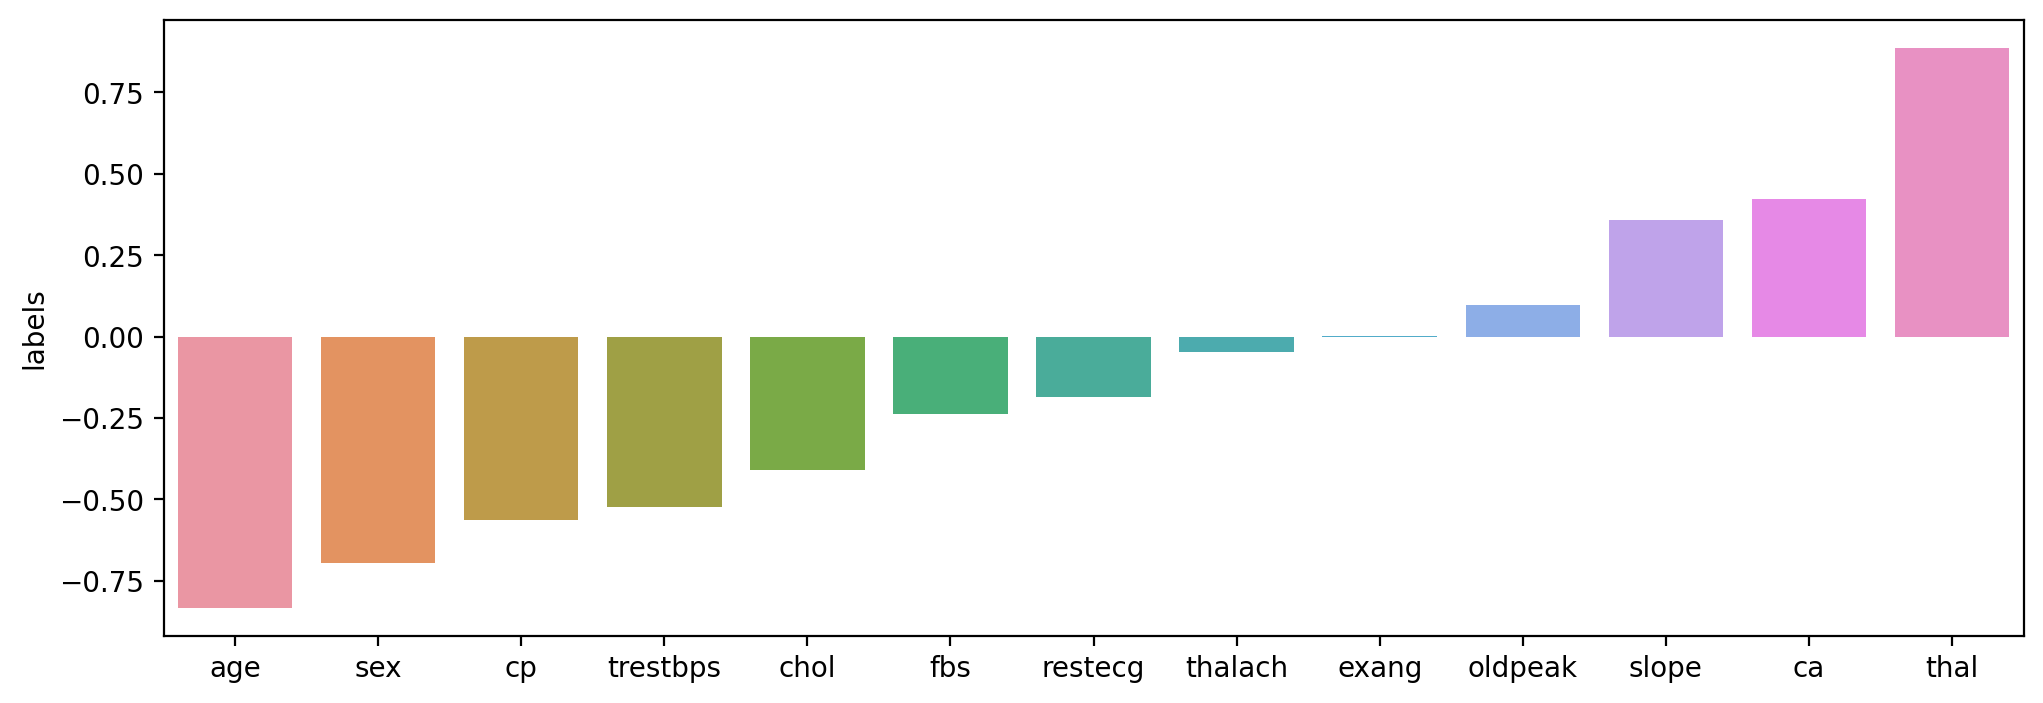

In [203]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(x=data.index, y=data.sort_values())

---------

## Оценка модели

**Оценим работу модели на оставшихся 10% данных - тестовом наборе данных.**

**ЗАДАНИЕ: Подготовим следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [165]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

In [166]:
y_pred = log_model_CV.predict(scaled_X_test)

In [167]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [170]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [169]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

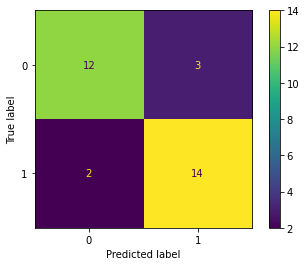

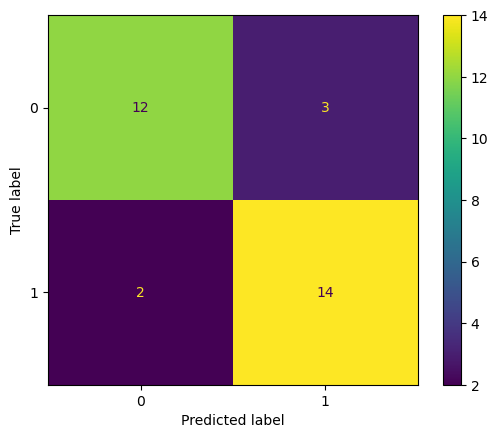

In [171]:
plot_confusion_matrix(log_model_CV, scaled_X_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Кривые производительности

**Нарисуем графики "precision recall curve" и "ROC Curve".**

In [175]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

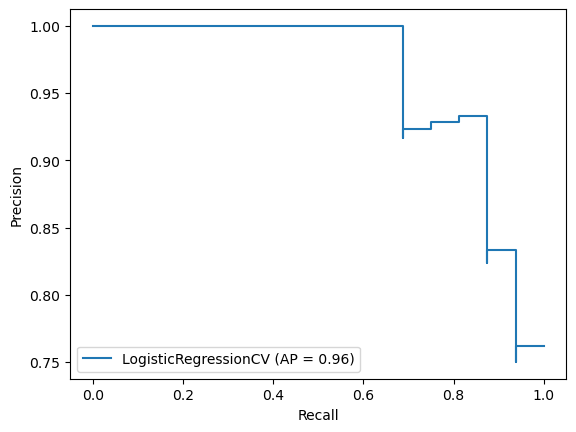

In [178]:
plot_precision_recall_curve(estimator=log_model_CV, X=scaled_X_test, y=y_test)

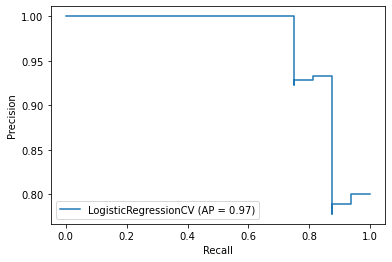

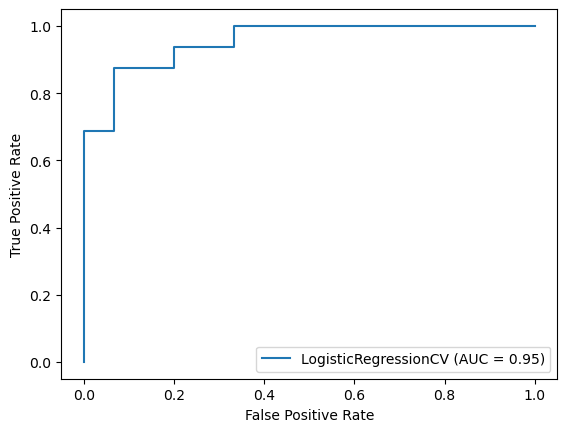

In [179]:
plot_roc_curve(log_model_CV, scaled_X_test, y_test)

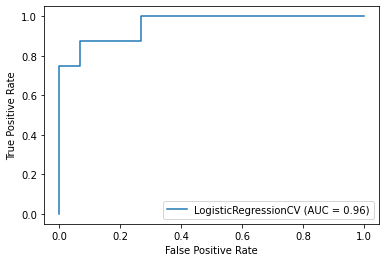

**Финальное задание: В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**Что предскажет данная модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?**


In [180]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [181]:
patient

[[54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]

In [183]:
pred = log_model_CV.predict(patient)

In [184]:
pred

array([0], dtype=int64)